<div style="border:solid green 3px; padding: 20px">

<b>Привет!</b>

Меня зовут Сороколетов Илья и я буду проверять твой проект. 

Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)


Для твоего удобства, я буду выделять свои комментарии следующим образом:

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>


Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>

<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 

Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху

Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)

P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
    
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удали этот текст и вместо него напиши свой комментарий 🙂
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
#Вывод таблицы во всю ширину
pd.set_option('display.max_columns', None)
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Отлично, что ты увеличиваешь лимит для отображаемых столбцов, чтобы было видно всю таблицу
</div>

Подсчет пропуска значений

In [5]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

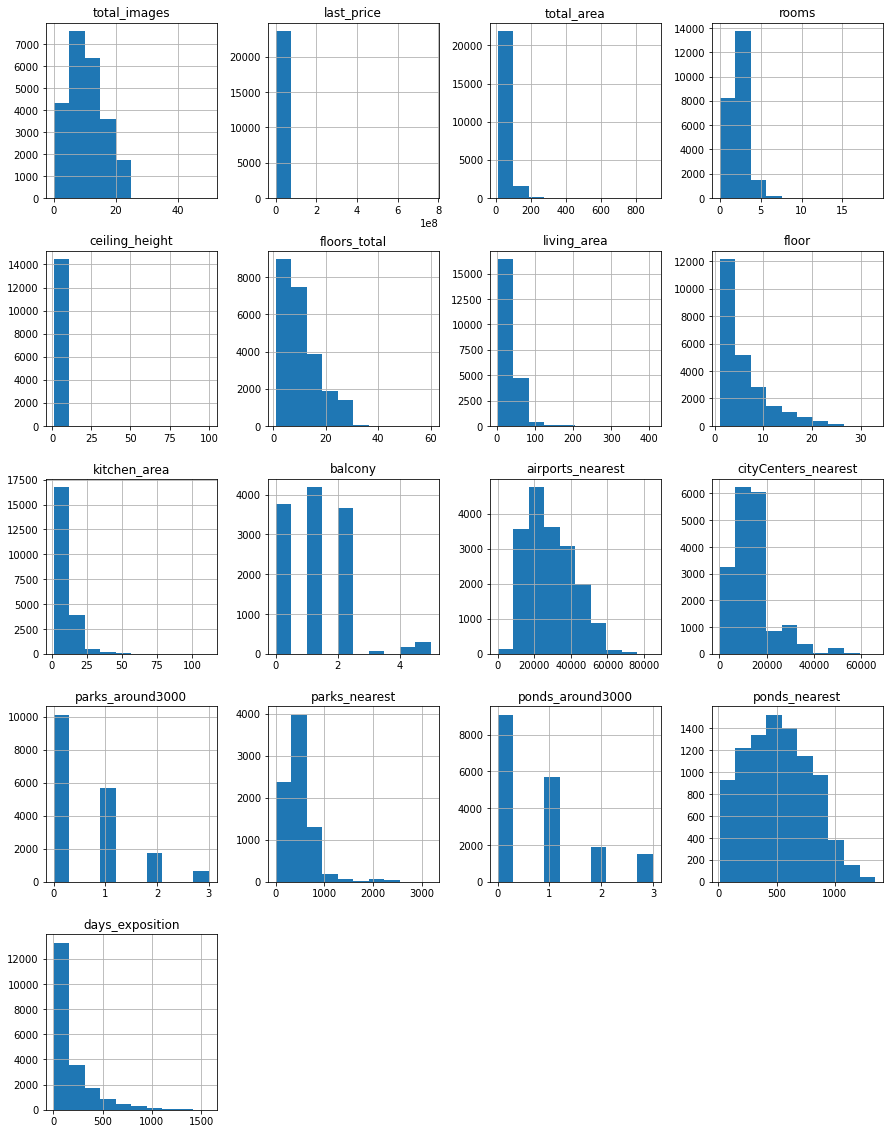

In [6]:
df.hist(figsize=(15,20));

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>
		
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если после кода вызывающего график добавить ";", то мы избавимся от строчки над графиком)
</div>

**Вывод:** 

Многие графики смещены влево, скорее всего имеются данные, являющиеся нехарактерными для всей совокупности. Также влияние могут оказывать отсутствующие данные.

Пропущенные значения более 5000 скорее всего не были заполнены изначально. Видимо, в  форме установлены значения по умолчанию **NaN** (не являются существенными) и программа обработки пропускала их и не показывала ошибку. Также есть столбцы с аномальными значениями, например  **ceiling_height** , со значением для высоты потолков в 100 м. Цены на жилье (**last_price**) тоже зашкаливают, но это может быть нормально. Названия населенных пунктов скорее всего пропали из-за "человеческого" фактора в результате неосторожности.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Рекомендую создать универсальную функцию, которая будет на вход принимать датафрейм, а на выходе будет выводить все необходимые характеристики поочередно применяя методы head, describe, info, duplicated и т.п.
</div>

### Предобработка данных

**Цена (last_price)**

In [7]:
df['last_price'].min()

12190.0

In [8]:
df['last_price'].max()

763000000.0

Минимальная цена нереалистична, проверим, что за объявление

In [9]:
df.query('last_price==12190.0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,False,False,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


В СПб квартира за 12190 - нереально, скорее всего ошибка. Посчитаем медианную цену.

In [10]:
df.query('total_area==109 and locality_name=="Санкт-Петербург"')['last_price'].median()

13350000.0

Наверное цену указывали в килорублях)

Меняем на реальную

In [11]:
df.loc[8793,'last_price'] = df.loc[8793,'last_price'] * 1000

In [12]:
df.loc[8793,'last_price']

12190000.0

Теперь похоже на правду. ПОменяем тип данных на **int**. Они занимают меньше места

In [13]:
#изменяем тип данных
df['last_price'] = df['last_price'].astype(int)

**Высота потолков (ceiling_height)**

Из графика видно, что имеются аномальные значения высоты потолка (от 25 до 100 м)

In [14]:
df.query('ceiling_height>10').groupby('ceiling_height')['ceiling_height'].count()

ceiling_height
10.3     1
14.0     1
20.0     1
22.6     1
24.0     1
25.0     7
26.0     1
27.0     8
27.5     1
32.0     2
100.0    1
Name: ceiling_height, dtype: int64

Скорее всего это связано с ошибкой ввода. Поделим эти значения на 10

In [15]:
df.loc[df['ceiling_height']>10,'ceiling_height'] = df['ceiling_height']/10

In [16]:
df.groupby('ceiling_height')['ceiling_height'].count()

ceiling_height
1.00     1
1.03     1
1.20     1
1.40     1
1.75     1
        ..
5.80     1
6.00     1
8.00     3
8.30     1
10.00    1
Name: ceiling_height, Length: 176, dtype: int64

Полный набор аномалий. 

Квартиры для Гулливера и его лиллипутов))). 

Удалим потолки высотой менее 2.4 и более 6 м. Округлим до 1 знака после запятой

In [17]:
df = df.drop(df[(df.ceiling_height>6) | (df.ceiling_height <2.4)].index)

In [18]:
df.groupby('ceiling_height')['ceiling_height'].agg(['count']).head(10)

,count
ceiling_height,
2.40,24
2.45,15
2.46,2
2.47,3
2.48,8
2.49,1
2.50,3522
2.51,34
2.52,79


Для заполнения пропущенных значений рассчитаем медианное значение, поскольку присутствуют очень высокие потолки 

In [19]:
cv_med = df['ceiling_height'].median()
cv_med

2.65

In [20]:
#заполнение пропущенных значений
df['ceiling_height']=df['ceiling_height'].fillna(cv_med)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен с таким решением, так как основная часть данных в этом столбце находится в небольшом диапазоне.
</div>

In [21]:
df['ceiling_height'] = np.round(df['ceiling_height'],decimals = 1)

In [22]:
df['ceiling_height'] = np.round(df['ceiling_height'],decimals = 1)

In [23]:
#проверяем количество пропусков
df['ceiling_height'].isna().sum()

0

**Жилая площадь (living_area)**

Пропущенные значения жилой площади присутствуют скорее всего по причине незнания собственниками, как она рассчитывается.

Рассчитаем пропущенные значения жилой площади рассчитаем с помощью коэффициента, равному отношению жилой к общей площади среди имеющихся данных.

In [24]:
print((df['living_area']/df['total_area']).mean())
print((df['living_area']/df['total_area']).median())

0.5647467945451988
0.5678233438485805


Медианное и среднее отношения близки друг к другу, потому возьмем среднее

In [25]:
koef_liv_tot = (df['living_area']/df['total_area']).mean()

In [26]:
df['living_area'] = df['living_area'].fillna(df['total_area'] * koef_liv_tot)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Прекрасный способ для замены! 👏🏻👏🏻👏🏻
</div>

In [27]:
#изменяем тип данных
df['living_area'] = df['living_area'].astype(int)

**Апартаменты (is_apartment)**

Пропущенные значения скорее всего означают, что квартира не является апартаментами, поэтому заполним значение **0**

После этого поменяем тип данных **int**. Он меньше и удобней для работы и отображения

In [28]:
df['is_apartment'] = df['is_apartment'].fillna(0)
df['is_apartment'] = df['is_apartment'].astype(int)

In [29]:
#проверяем количество пропусков
df['is_apartment'].isna().sum()

0

**Этажность дома (floors_total)**

Этажность не указана в очень редких случаях (всего 86). Может быть это связано с нежеланием указывать, что жилплощадь на последнем этаже. Пусть пропущенные значения этажности дома ниже медианного будут равны медианной этажности, а те значения, для которых жилплощадь на этаже выше медианной будем приравнивать к этому этажу.

In [30]:
floors_median = df['floors_total'].median()
floors_median

9.0

In [31]:
df.loc[(df['floor'] <= floors_median) & (df['floors_total'].isna()),'floors_total'] = floors_median

In [32]:
df.loc[(df['floor'] > floors_median) & (df['floors_total'].isna()),'floors_total'] = df['floor']

In [33]:
#проверяем количество пропусков
df['floors_total'].isna().sum()

0

In [34]:
#изменяем тип данных
df['floors_total'] = df['floors_total'].astype(int)

**Площадь кухни**

Есть минимальные нормы площадей помещений, в том числе и для кухни. Учитывая, что нормы строительства обычно соблюдаются, то пропущенные значения заполним медианным значением отношения площади кухни к общей плпщади.
Особняком стоят *студии*, но их мало и их не жалко

In [35]:
ka_avg = (df['kitchen_area']/df['total_area']).mean()
ka_med = (df['kitchen_area']/df['total_area']).median()
print(ka_avg)
print(ka_med)

0.18736247371753945
0.1724137931034483


Оказалось, что и среднее и медианное довольно близки. В интернете было встречен коэф 0.15. Но Питер есть Питер, пусть будет побольше

In [36]:
df['kitchen_area'] = df['kitchen_area'].fillna(ka_med * df['total_area'])

In [37]:
#проверяем количество пропусков
df['kitchen_area'].isna().sum()

0

In [38]:
#изменяем тип данных
df['kitchen_area'] = df['kitchen_area'].astype(int)

**Балконы**

В застройках "советской эпохи" отсутствие балконов и лоджий - это крайне редкое явление. В основном, это дома до 9 этажей. В современных застройках отсутствие балконов встречается довольно часто (например, для эконмии или увеличения площади жилья). В связи с этим, пропущеные значения в домах до 10 этажей заполним 1, а выше - 0

In [39]:
df.loc[(df['floors_total'] <=9) & (df['balcony'].isna()),'balcony' ] = 1

In [40]:
df.loc[(df['floors_total'] > 9) & (df['balcony'].isna()),'balcony' ] = 0

In [41]:
#проверяем количество пропусков
df['balcony'].isna().sum()

0

In [42]:
#изменяем тип данных
df['balcony'] = df['balcony'].astype(int)

Балконов "дробных" не бывает

**Названия населенных пунктов**

Дадим имена неизвестным **unknown**

In [43]:
df['locality_name'] = df['locality_name'].fillna('unknown')

Отобразим столбцы, характеризующие населенный пункт (расстояние до аэропорта, центра, парки) и удалим те строки, в которых нет даной информации

In [44]:
df.query('locality_name=="unknown"')[['airports_nearest','cityCenters_nearest','parks_around3000','parks_nearest']].head(10)

,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest
1097,23478.0,4258.0,0.0,NaN
2033,NaN,NaN,NaN,NaN
2603,22041.0,17369.0,0.0,NaN
2632,22041.0,17369.0,0.0,NaN
3574,27419.0,8127.0,0.0,NaN
4151,25054.0,3902.0,1.0,485.0
4189,21774.0,3039.0,1.0,690.0
4670,26534.0,5382.0,1.0,446.0
5343,10556.0,9538.0,1.0,67.0
5707,21460.0,16788.0,0.0,NaN


Видно, что известны расстояния до аэропорта и центра, также есть информация о парках. Похоже, что это города. Расстояния похожи на те, что характерны для Санкт-Петербурга. Посчитаем:

In [45]:
df.query('locality_name=="Санкт-Петербург"')[['airports_nearest','cityCenters_nearest']].agg(['mean','max'])

,airports_nearest,cityCenters_nearest
mean,28045.419291,11600.452326
max,54784.000000,29493.000000


In [46]:
mean_air = 28046
mean_center = 11601
max_air = 54784
max_center = 29493

Почти все вписываются в СПб. 

Выбиваются из значения строки: 

| номер   | аэр| центр|
| --------|:--:|------|
| 8986    |  20 | 32|
| 21276   | 60 |41|

Посмотрим, что за населенные пункты. Найдем средние расстояния до аэропорта и центра для имеющихся нас. пунктов. 

In [47]:
temp = df.groupby(by='locality_name')['airports_nearest','cityCenters_nearest'].agg(['mean'])
temp.columns = ['air','center']
temp.sort_values('air',ascending=False).head(30)

/tmp/ipykernel_129/92546549.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = df.groupby(by='locality_name')['airports_nearest','cityCenters_nearest'].agg(['mean'])


,air,center
locality_name,,
посёлок Молодёжное,84430.200000,65529.200000
Зеленогорск,73300.250000,54617.583333
Кронштадт,67469.263158,49195.726316
посёлок Репино,62293.250000,43392.250000
посёлок Щеглово,61908.000000,34085.000000
посёлок Белоостров,57769.000000,38868.000000
Сестрорецк,56640.486339,34624.480874
поселок Лисий Нос,55930.000000,28246.000000
посёлок Лисий Нос,54988.500000,27297.000000


Похоже, что это **Павловск** и **посёлок Репино**

Заполним пробелы. Для значений, которые относим к Питеру характерно, что расст до аэропорта больше, чем до центра

In [48]:
df.loc[(df['locality_name'] =='unknown') & (df['airports_nearest'] > df['cityCenters_nearest']),'locality_name'] = 'Санкт-Петербург'

In [49]:
df.query('locality_name=="unknown"')[['airports_nearest','cityCenters_nearest','parks_around3000','parks_nearest']]

,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest
2033,NaN,NaN,NaN,NaN
8986,19659.0,31813.0,0.0,NaN
13690,20234.0,23659.0,0.0,NaN
14342,NaN,NaN,NaN,NaN
17535,NaN,NaN,NaN,NaN
20382,NaN,NaN,NaN,NaN
20590,NaN,NaN,NaN,NaN
21119,19744.0,31897.0,0.0,NaN
21715,NaN,NaN,NaN,NaN
21898,NaN,NaN,NaN,NaN


In [50]:
df.loc[8986,'locality_name'] = "Павловск"

In [51]:
df.loc[21119,'locality_name'] = "посёлок Рощино"

In [52]:
#остаток, не попавший под условие Питера
df.loc[13690,'locality_name'] = "Санкт-Петербург"

Строки с оставшимися неизвестными населенными пунктами удаляем (8 значений картину не изменят)

In [53]:
df = df[df["locality_name"].str.contains("unknown")== False ]

In [54]:
#проверяем количество пропусков
df['locality_name'].isna().sum()

0

**Повторы в названиях населенных пунктов**

In [55]:
nas_punkt = list(df['locality_name'].unique())
sorted(nas_punkt)

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

Из приведенного списка видно, что есть *поселок* и *посёлок*, *городской посёлок* и *поселок городского типа*, а также *посёлок при железнодорожной станции, коттеджный посёлок*.

заменим *е* на *ё* и все посёлки, кроме *городского типа* преобразуем просто в посёлки

In [56]:
df.replace('(поселок)','посёлок',regex=True, inplace = True)
df.replace('(городской посёлок)','посёлок городского типа',regex=True, inplace = True)

In [57]:
df.replace('(посёлок городского типа)','пгт.',regex=True, inplace = True)
df.replace('(посёлок при железнодорожной станции|коттеджный посёлок)','посёлок',regex=True, inplace = True)

In [58]:
df.replace('(посёлок городского типа)','пгт.',regex=True, inplace = True)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Здесь всё верно)
</div>

**Расстояние до аэропорта**

Всего пропусков

In [59]:
df['airports_nearest'].isna().sum()

5518

Посчитаем пропуски для СПб

In [60]:
df.query('locality_name=="Санкт-Петербург"')['airports_nearest'].isna().sum()

85

In [61]:
#процент "потерь" от питерских данных
85/23661

0.003592409450150036

<div style="border:solid green 3px; padding: 20px">
<div class="alert alert-info">
<b>Доработка</b>
<br>
Во избежание искажения данных не будем заполнять ячейки с отсутствующими данными

<del>Заполним пропуски для СПб медианным значением</del>

#air_spb_median = df.query('locality_name=="Санкт-Петербург"')['airports_nearest'].median()
#air_spb_median
    
#df.loc[(df['locality_name']=="Санкт-Петербург") & (df['airports_nearest'].isna()),'airports_nearest'] = air_spb_median
    
#df['airports_nearest'].isna().sum()    
    
</div>
    
<div>


Менять тип данных не будем, так как отсутствующие значения не позволят поменять на int

Удалять строки не будем, потому что их достаточно много и значения в других столбцах пригодятся

**Расстояние до центра**

In [62]:
df['cityCenters_nearest'].isna().sum()

5495

In [63]:
df.query('locality_name=="Санкт-Петербург"')['cityCenters_nearest'].isna().sum()

61

<div style="border:solid green 3px; padding: 20px">
<div class="alert alert-info">
<b>Доработка</b>
<br>
Во избежание искажения данных не будем заполнять ячейки с отсутствующими данными

<del>Заполним пропуски для СПб медианным значением</del>

   
</div>
    
<div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Пропуски в столбцах с картографическими данными лучше не трогать. Заполняя их таким образом, ты проставляешь одинаковые расстояния до центра (парка, прудов, аэропорта) для разных квартир, хотя они могут быть расположены в разных частях города. Эти пропуски заполнять не нужно
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

Менять тип данных не будем, так как отсутствующие значения не позволят поменять на int

Удалять строки не будем, потому что их достаточно много и значения в других столбцах пригодятся

**Наличие парков в радиусе 3 км (parks_around3000)**

In [64]:
df['parks_around3000'].isna().sum()

5494

In [65]:
df.query('locality_name=="Санкт-Петербург"')['parks_around3000'].isna().sum()

61

Заполним пропуски для СПб нулевым значением, потому что их не указали скорее всего потому, что их попросту нет

In [66]:
df.loc[(df['locality_name']=="Санкт-Петербург") & (df['parks_around3000'].isna()),'parks_around3000'] = 0

**Наличие водоемов в радиусе 3 км (parks_around3000)**

In [67]:
df['ponds_around3000'].isna().sum()

5494

In [68]:
df.query('locality_name=="Санкт-Петербург"')['ponds_around3000'].isna().sum()

61

Одинаковое значение повторяется в СПб уже в третий раз. Скорее всего это какие-то продавцы, которые район не знают. Возможно, наследники из других городов или, что более вероятно, стран

In [69]:
df.loc[(df['locality_name']=="Санкт-Петербург") & (df['ponds_around3000'].isna()),'ponds_around3000'] = 0

In [70]:
df.loc[(df['ponds_around3000']==0) & (df['ponds_nearest']>=0),'ponds_nearest'] = np.NaN

Менять тип данных не будем, так как отсутствующие значения не позволят поменять на int

Удалять строки не будем, потому что их достаточно много и значения в других столбцах пригодятся

**Преобразование столбца first_day_exposition в формат date_time**

In [71]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'],format='%Y-%m-%d')

Пропущенные значения в столбце days_exposition скорее всего означают, что не проданы квартиры до сих пор.

<div style="border:solid green 3px; padding: 20px">
<div class="alert alert-info">
<b>Доработка</b>
<br>
Во избежание искажения данных не будем заполнять ячейки с отсутствующими данными

<del>Предположим, что их продали сегодня. </del>

<del>Заполним пропущенные значения в столбце days_exposition на количество дней, прошедших с момента подачи объявления до сегодняшнего дня.</del>    

<del>Вычисление текущей даты</del>
    
<del>td1 = pd.Timestamp.today() </del>

<del>#d1</del>
    
<del>df['days_exposition'] = df['days_exposition'].fillna(round((td1 - df['first_day_exposition'])/np.timedelta64(1,'D')))</del>
</div>
    
<div>



<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Эти пропуски заполнять не нужно, у тебя из-за этого потом появляется искажение в данных
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

В итоге получаем следующую картину:

In [72]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5518
cityCenters_nearest      5495
parks_around3000         5433
parks_nearest           15590
ponds_around3000         5433
ponds_nearest           14559
days_exposition          3176
dtype: int64

<div class="alert alert-info">
<b>Доработка</b>
    Отбросим значения, яывляющиеся аномально большими для наших данных
<br>
</div>

**Общая площадь**
На графике видно, что значения более 200 кв.м прктически не встречаются. Удалим их

In [73]:
#Правка
dd = df.query('total_area<200')

In [74]:
dd.shape[0]/df.shape[0]

0.9902370990237099

**Цена объекта**

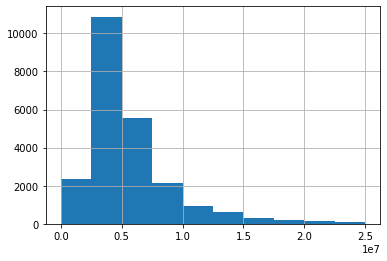

In [75]:
dd['last_price'].hist(range=(0,25000000));

Мало квартир дороже 20 млн. руб

In [76]:
del_price = dd.query('last_price<20000000')

In [77]:
del_price.shape[0]/df.shape[0]

0.9676260513080597

**Отбрасывание строк с квартирами**

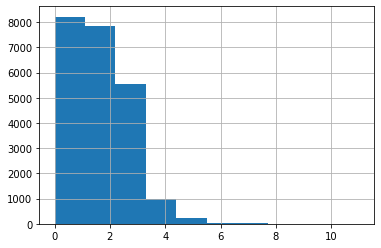

In [78]:
del_price['rooms'].hist();

Больше 5 комнат - это уже редкость.


In [79]:
del_room = del_price.query('rooms<6')

In [80]:
del_room.shape[0]/df.shape[0]

0.9648789146697097

In [81]:
df = del_room

"Потери" составили 4.6%

**Вывод:**

Практические все значения были восстановлены, удалена незначительная часть исходных данных (в основном аномальные значения и строки, в которых пропущено много данных, включая наименование населенного пункта)

Были проанализированы и заполнены пропущенные значения в столбцах:

**ceiling_height** - изменены аномальные высоты и после изменений удалены строки с нереальными высотами потолков.

**floors_total** - пропущенные значения заменены на текущий этаж квартиры

**living_area** - пропущенные значения заменены путем умножения общей площади на коэффициент, равный медианному значению долей жилых площадей по отношению к общей площади помещений

**kitchen_area** - аналогично **living_area**

**balcony** - пропущенным значениям в квартирах, предположительно старой застройки присвоены единицы, остальные обращены в 0

**is_apartment** - пропущенным значениям в столбце апартаменты прсвоены 0

**locality_name** - пропуски были заполнены "Санкт-Петербург" и еще два населенных пункта в области

**airports_nearest** - для СПб заполнены медианным значением для СПб, остальные оставлены пустыми

**cityCenters_nearest** - аналогично **airports_nearest**

Пропущенные значения оставлены для населенных пунктов в области (деревни, села, поселки). Тоже самое касается парков и водоемов

<div class="alert alert-info">
<b>Доработка</b>
<br>
    <b>days_exposition</b> - пропущенные значения оставлены без изменений
</div>

Типы данных, где это возможно из float преобразованы в int


<div class="alert alert-info">
<b>Доработка</b>
<br>
Были отброшены аномально высокие знаяения для площади квартиры (более 200 кв.м), общей цены объекта (более 20 млн.руб) и количества комнат (более 5 комнат)
    
Было отброшено порядка 5% данных
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Отличная работа! Не забывай, что не всегда стоит делать замену, ради замены. Очень важно обоснование. Иногда пропуски можно удалить (если их мало), либо вообще не трогать, если у нас нет возможности подобрать аргументированный способ замены
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Давай ещё изучим аномалии в других столбцах. Аномальное значение не значит, что оно нереальное или не может существовать. Это значит, что такое значение выделяется на общем фоне и встретить его большая редкость. Посмотри какие значения есть в столбцах со стоимостью квартиры, количеством комнат и общей площадью. Кажется, в них есть значения, которые сильно выделяются на общем фоне (слишком высокие). Не забудь проверить какое количество данных мы в итоге отбрасываем. Это количество не должно превышать 10% от изначального объёма данных. C этим может помочь следующий код

	new_data.shape[0] / old_data.shape[0]
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v2:</b> 
<br>Правка не выполнена. Давай разберём на примере общей площади (график ниже). На графике чётко видно, что после 200м квартир практически нет, а после 300 линии даже не видно. В данном случае аномальными значениями можно считать все квартиры больше 200-300м. Значит эти значения нужно отбросить.
</div>



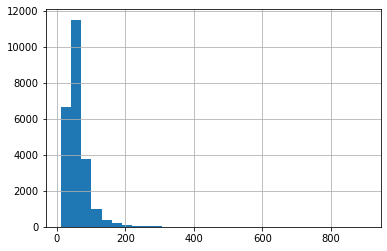

In [82]:
#код ревьюера
data2 = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
(data2['total_area']).hist(bins=30);

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v3:</b>
<br>Отлично! Теперь всё верно)
</div>

**Добавление столбцов**

In [83]:
pd.options.mode.chained_assignment = None

**Цена одного квадратного метра**

In [84]:
df['price_metr'] = df['last_price'] / df['total_area']

**День недели публикации**

In [85]:
df['weekday'] = df['first_day_exposition'].dt.weekday

**Месяц публикации объявления**

In [86]:
df['month'] = df['first_day_exposition'].dt.month

**Год публикации объявления**

In [87]:
df['year'] = df['first_day_exposition'].dt.year

Создание функции для вычисления типа этажа

In [88]:
def floor_type(row):
    """
    вычисления типа этажа
    Вход - строка данных
    Выход - тип этажа (first, last,other)
    """
    if row['floor'] == 1:
        return 'first'
    elif row['floor'] == row['floors_total']:
        return 'last'
    else:
        return 'other'

In [89]:
#применение функции вычисления типа этажа к строкам датафрейма 
df['floor_type'] = df.apply(floor_type,axis=1)

**Расстояние до центра города в километрах**

In [90]:
df['cityCenters_km'] = round(df['cityCenters_nearest']/1000)

In [91]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_metr,weekday,month,year,floor_type,cityCenters_km
0,20,13000000,108.0,2019-03-07,3,2.7,16,51,8,0,False,False,25,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,other,16.0
1,7,3350000,40.4,2018-12-04,1,2.6,11,18,1,0,False,False,11,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,first,19.0
2,10,5196000,56.0,2015-08-20,2,2.6,5,34,4,0,False,False,8,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,other,14.0
4,2,10000000,100.0,2018-06-19,2,3.0,14,32,13,0,False,False,41,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,other,8.0
5,10,2890000,30.4,2018-09-10,1,2.6,12,14,5,0,False,False,9,0,пгт. Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,other,NaN


In [92]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5492
cityCenters_nearest      5475
parks_around3000         5428
parks_nearest           15344
ponds_around3000         5428
ponds_nearest           14319
days_exposition          2944
price_metr                  0
weekday                     0
month                       0
year                        0
floor_type                  0
cityCenters_km           5475
dtype: int64

**Вывод**

Все требуемые столбцы были добавлены.

Затруднений не возникло

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

### Проведите исследовательский анализ данных

#### Изучение параметров

При этапе изучения общей информации и предобработки данных было замечено, что данные имеют большрй разброс. Будем изучать параметры и сохранять в словаре **k_var** коэффициенты вариации (он показывает степень изменчивости по отношению к среднему показателю выборки). Впоследствии будем их использовать для формирования выборки.

In [93]:
k_var ={}

**Общая площадь**

In [94]:
df['total_area'].describe()

count    22830.000000
mean        56.097597
std         22.912872
min         12.000000
25%         39.900000
50%         51.000000
75%         67.000000
max        199.200000
Name: total_area, dtype: float64

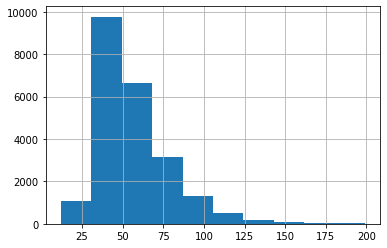

In [95]:
df['total_area'].hist();

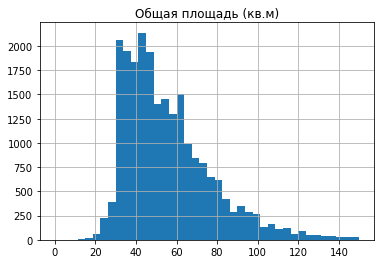

In [96]:
df['total_area'].hist(range=(0,150),bins=40);
plt.title('Общая площадь (кв.м)');
plt.show();

In [97]:
kv_tot_ar = df['total_area'].std()/df['total_area'].mean()
kv_tot_ar

0.4084465809869562

In [98]:
k_var['kv_tot_ar'] = kv_tot_ar

Наблюдается большой разброс значений. min - 12, max = 900 кв.м. Гистограмма сдвинута к крайнему левому положению. Изменение диапазона отображаемых значений приводит к более равномерному распределению данных на графике. Возможно, придется отбрасывать данные.
Наиболее продаваемой является жилье площадью 30-70 кв.м. Это скорее всего однокомнатные и двухкомнатные квартиры

In [99]:
#Подсчет границы 95% (Q3+1.5*std)
70+1.5*35

122.5

In [100]:
df.query('total_area<123')['total_area'].count()/df.shape[0]

0.9835742444152431

96% выборка покрывается квартирами, площадь которых не превышает 123 кв.м

**Жилая площадь**

In [101]:
df['living_area'].describe()

count    22830.000000
mean        31.828471
std         15.297360
min          2.000000
25%         18.000000
50%         30.000000
75%         41.000000
max        145.000000
Name: living_area, dtype: float64

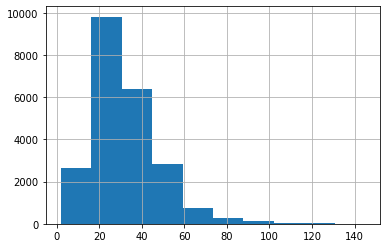

In [102]:
df['living_area'].hist();

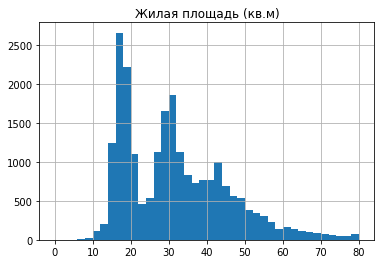

In [103]:
df['living_area'].hist(range=(0,80),bins=40);
plt.title('Жилая площадь (кв.м)');
plt.show();

In [104]:
#Вычисляем коэффициент вариации и заносим его в словарь
kv_liv_ar = df['living_area'].std()/df['living_area'].mean()
kv_liv_ar

0.48061873542250716

In [105]:
k_var['kv_liv_ar'] = kv_liv_ar

Колебания между средним и медианным значением не так заметны. Но коэффициент вариации больше (0.65), чем у общей площади.

**Площадь кухни**

In [106]:
df['kitchen_area'].describe()

count    22830.000000
mean         9.679763
std          4.615838
min          1.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         64.000000
Name: kitchen_area, dtype: float64

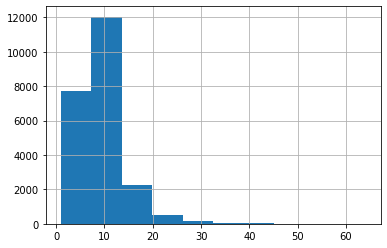

In [107]:
df['kitchen_area'].hist();

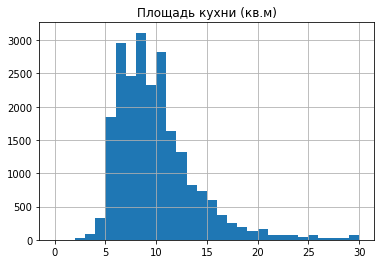

In [108]:
df['kitchen_area'].hist(range=(0,30),bins=30);
plt.title('Площадь кухни (кв.м)');
plt.show();

In [109]:
kv_kith_ar = df['kitchen_area'].std()/df['kitchen_area'].mean()
kv_kith_ar

0.47685441062835643

In [110]:
k_var['kv_kith_ar'] = kv_kith_ar

В большинстве продаваемых квартир кухни малой площади. Есть провалы, которые связаны, возможно, с разными проектами квартир Практические соответствует гистограмме общей площади (коэффициенты вариации практически совпадают). Есть связь между общей площадью и площадью кухни

**Цена объекта**

In [111]:
df['last_price'].describe()

count    2.283000e+04
mean     5.372518e+06
std      3.134670e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.550000e+06
75%      6.468500e+06
max      1.999900e+07
Name: last_price, dtype: float64

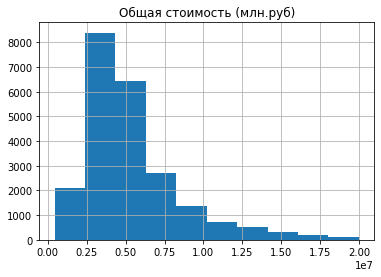

In [112]:
df['last_price'].hist();
plt.title('Общая стоимость (млн.руб)');

In [113]:
aa = df['last_price']/1000000

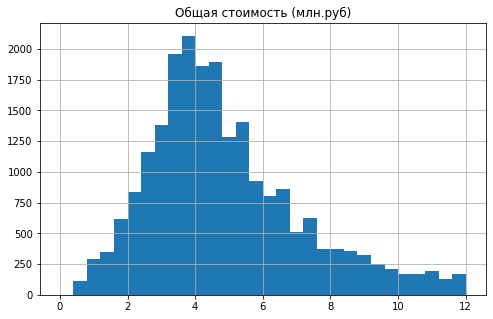

In [114]:
aa.hist(range=(0,12),figsize=(8,5),bins=30);
plt.title('Общая стоимость (млн.руб)');

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Тут можно разделить все значения в столбце last_price на 1 млн, чтобы они пришли в более понятный вид)
</div>

In [115]:
kv_price = df['last_price'].std()/df['last_price'].mean()
kv_price

0.5834638269542363

In [116]:
k_var['kv_price'] = kv_price

In [117]:
#Подсчет границы 95% (Q3+1.5*std)
price_lim = 6800000+1.5*1.089470e+07
price_lim

23142050.0

In [118]:
df.query('last_price<@price_lim')['last_price'].count()/df.shape[0]

1.0

97% выборки ограничивается ценой 23150000 рублей

Показатель, имеющий самые большие колебания и очень высокую вариативность значений. Коэффициент вариации больше 1,5. Минимальное максимальное значения отличаются почти на 2 порядка. Наибольшее количество предложений в ценовой категории от 2 до 6.8 млн. рублей 

**Количество комнат**

In [119]:
df['rooms'].describe()

count    22830.000000
mean         1.990188
std          0.942608
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

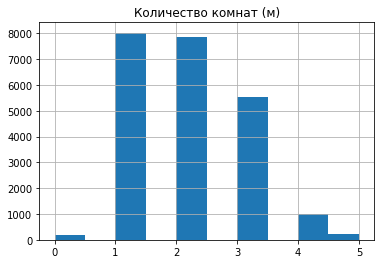

In [120]:
df['rooms'].hist();
plt.title('Количество комнат (м)');
plt.show();

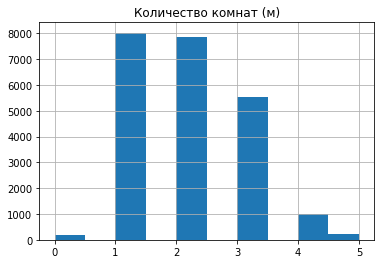

In [121]:
df['rooms'].hist(range=(0,5));
plt.title('Количество комнат (м)');
plt.show();

In [122]:
#Вычисляем коэффициент вариации и заносим его в словарь
kv_rooms = df['rooms'].std()/df['rooms'].mean()
kv_rooms

0.47362766271141993

In [123]:
k_var['kv_rooms'] = kv_rooms

Среднее и медианное значения очень близки друг к другу. Пока это самый стабильный показатель. Ожидаемо, что самые продаваемые квартиры это однокомнатные и двухкомнатные. Они же имеют и самую высокую стоимость квадратного метра в СПб среди наиболее продаваемых, что подтвердается ниже приведенной сводной таблицей.

In [124]:
df.query('locality_name=="Санкт-Петербург"').pivot_table(index='rooms',values='price_metr',aggfunc=['mean','median','count']).head(5)

,mean,median,count
,price_metr,price_metr,price_metr
rooms,,,
0,122776.823048,122222.222222,109
1,115126.477121,110714.285714,4931
2,109780.246575,103244.406435,5040
3,101860.596775,95698.924731,3885
4,97305.390200,92666.666667,798


In [125]:
3+1.07*1.5

4.605

In [126]:
df.query('rooms<5')['rooms'].count()/df.shape[0]

0.9904949627682873

**Высота потолков**

In [127]:
df['ceiling_height'].describe()

count    22830.000000
mean         2.668515
std          0.204609
min          2.400000
25%          2.600000
50%          2.600000
75%          2.700000
max          5.800000
Name: ceiling_height, dtype: float64

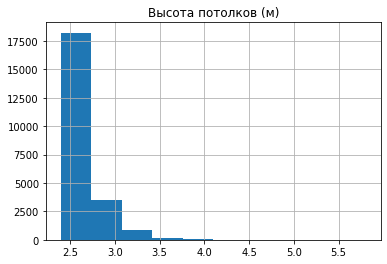

In [128]:
df['ceiling_height'].hist();
plt.title('Высота потолков (м)');
plt.show();

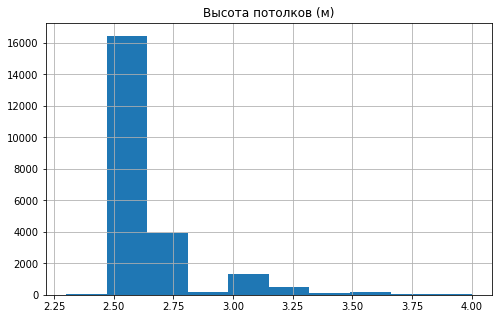

In [129]:
df['ceiling_height'].hist(range=(2.3,4),figsize=(8,5));
plt.title('Высота потолков (м)');
plt.show();

In [130]:
#Вычисляем коэффициент вариации и заносим его в словарь
kv_ceil_h = df['ceiling_height'].std()/df['ceiling_height'].mean()
kv_ceil_h

0.07667507240357022

In [131]:
k_var['kv_ceil_h'] = kv_ceil_h

Данный параметр вообще практически не имеет колебаний.

**Этаж квартиры и Общее количество этажей в доме**

Эти два параметра рассмотрим вместе

In [132]:
df[['floor','floors_total']].describe()

,floor,floors_total
count,22830.000000,22830.000000
mean,5.905125,10.766316
std,4.907344,6.629380
min,1.000000,1.000000
25%,2.000000,5.000000
50%,4.000000,9.000000
75%,8.000000,16.000000
max,33.000000,60.000000


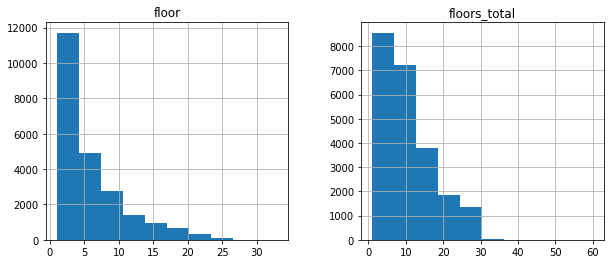

In [133]:
df[['floor','floors_total']].hist(figsize=(10,4));

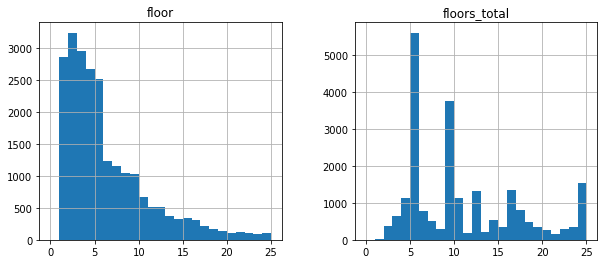

In [134]:
df[['floor','floors_total']].hist(bins=25,range=(0,25),figsize=(10,4));

In [135]:
#Вычисляем коэффициент вариации и заносим его в словарь
kv_floor = df['floor'].std()/df['floor'].mean()
kv_floor

0.831031334156486

In [136]:
k_var['kv_floor'] = kv_floor

In [137]:
#Вычисляем коэффициент вариации и заносим его в словарь
kv_fl_tot = df['floors_total'].std()/df['floors_total'].mean()
kv_fl_tot

0.6157518983898251

In [138]:
k_var['kv_fl_tot'] = kv_fl_tot

Медианные значения не сильно отличаются от средних, хотя у этажей, на которых продаются квартиры он немного выше, что подтверждается и коэфф. вариации. Гистограмма у этажей более гладкая, чем у этажности домов. Так оно и есть, ведь много квартир продается на одних и тех же этажах в домах разной этажности. 

Что интересно, так это тот факт, что продается больше квартир в пяти и девятиэтажных домах (правый график). Видимо, это старый жилой фонд. По этой причине и количество квартир, продаваемых на этажах от 1 до 9 наибольшее (левый график)

**Тип этажа квартиры**

In [139]:
df['floor_type'].describe()

count     22830
unique        3
top       other
freq      16772
Name: floor_type, dtype: object

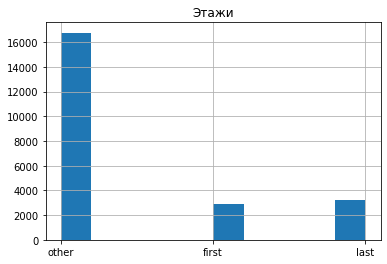

In [140]:
df['floor_type'].hist();
plt.title('Этажи');
plt.show();

Данная гистограмма показывает, что на первых и последних этажах квартир немало. В сумме около 6 тысяч, почти 25%.

**Расстояние до центра города в метрах**

In [141]:
df['cityCenters_nearest'].describe()

count    17355.000000
mean     14542.091904
std       8565.860539
min        208.000000
25%       9886.000000
50%      13302.000000
75%      16472.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

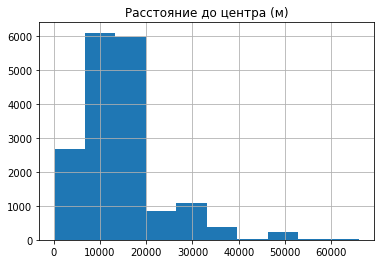

In [142]:
df['cityCenters_nearest'].hist();
plt.title('Расстояние до центра (м)');
plt.show();

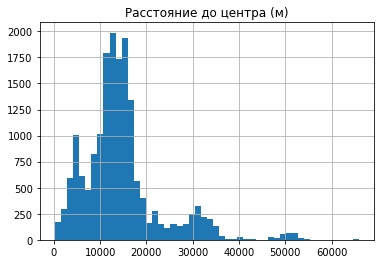

In [143]:
df['cityCenters_nearest'].hist(bins=50);
plt.title('Расстояние до центра (м)');
plt.show();

In [144]:
#Вычисляем коэффициент вариации и заносим его в словарь
kv_city_centr = df['cityCenters_nearest'].std()/df['cityCenters_nearest'].mean()
kv_city_centr

0.5890390870705984

In [145]:
k_var['kv_city_centr'] = kv_city_centr

Медианное значение близко к среднему (в рамках Ленинградской области). Это говорит о том, что основная часть продаваемого жилья равномерно распределена на местности. В центре города объявлений не так много. Большинство продается на расстоянии от 15 до 18 км от центра города. Большинство данных о жилье в селах, поселках и деревнях отсутствует, так как не было указано в исходных данных

**Расстояние до ближайшего аэропорта**

In [146]:
df['airports_nearest'].describe()

count    17338.000000
mean     28873.497751
std      12815.323559
min          0.000000
25%      18399.000000
50%      26903.000000
75%      37434.000000
max      84869.000000
Name: airports_nearest, dtype: float64

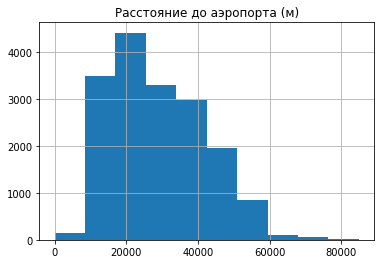

In [147]:
df['airports_nearest'].hist();
plt.title('Расстояние до аэропорта (м)');
plt.show();

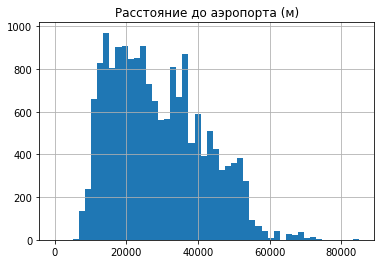

In [148]:
df['airports_nearest'].hist(bins=50);
plt.title('Расстояние до аэропорта (м)');
plt.show();

In [149]:
df.query('airports_nearest==0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_metr,weekday,month,year,floor_type,cityCenters_km
21085,0,7000000,34.7,2018-09-23,1,2.7,9,19,3,0,False,False,6,2,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0,201729.106628,6,9,2018,other,23.0


Это, видимо, жилье в Пулково

In [150]:
kv_air = df['airports_nearest'].std()/df['airports_nearest'].mean()
kv_air

0.44384382072510714

In [151]:
k_var['kv_air'] = kv_air

Характеристики показателя близки к тем, что демонстрирует расстояние до центра города. Медианное значение близко к среднему. Гистограмма более гладкая. Перепадов меньше. Большинство продается на расстоянии от 15 до 40 км от центра города. 

Сопоставим две гистограммы (до центра и до аэропорта)

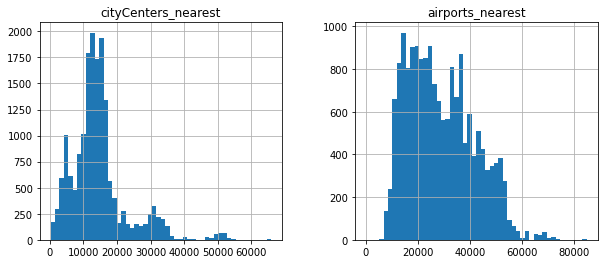

In [152]:
df[['cityCenters_nearest','airports_nearest']].hist(bins=50,figsize=(10,4));


In [153]:
#доля объявлений о продаже в СПб
len(df.query('locality_name=="Санкт-Петербург"'))/len(df)

0.6547087166009636

Более плотная группировка в области 15-20 км. до центра и 15 - 40 км. до аэропорта наводит на мысль, что это примерно один и тот же район на карте. Если посмотреть на карту СПб, то это северная часть города. От северо-запада, до северо-востока. На юге города жилья продается меньше. 

66% объявлений - это квартиры в СПб

**Расстояние до ближайшего парка**

In [154]:
df['parks_nearest'].describe()

count    7486.000000
mean      494.508683
std       342.917382
min         1.000000
25%       290.000000
50%       456.000000
75%       616.000000
max      3190.000000
Name: parks_nearest, dtype: float64

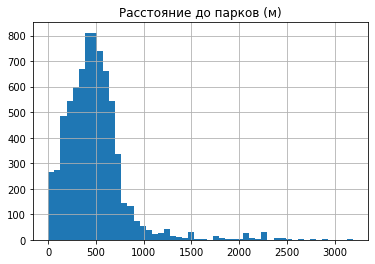

In [155]:
df['parks_nearest'].hist(bins=50);
plt.title('Расстояние до парков (м)');
plt.show();

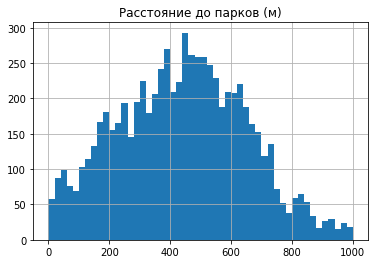

In [156]:
df['parks_nearest'].hist(bins=50,range=(0,1000));
plt.title('Расстояние до парков (м)');
plt.show();

In [157]:
#Вычисляем коэффициент вариации и заносим его в словарь
kv_parks = df['parks_nearest'].std()/df['parks_nearest'].mean()
kv_parks

0.693450680092512

In [158]:
k_var['kv_parks'] = kv_parks

Показатель демонстрирует практически "нормальное" распределение c небольшими колебаниями в области 1 км.. Медиана и среднее близки по значениям. Учитывая, что на этапе подготовки данных остались за бортом деревни и села, можно сказать, что Санкт-Петербург не только культурная столица, там есть где и воздухом подышать. Купив жилье в СПб, парк, при желании, можно найти неподалеку.

**День публикации объявления**

In [159]:
df['weekday'].describe()

count    22830.000000
mean         2.570258
std          1.790396
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

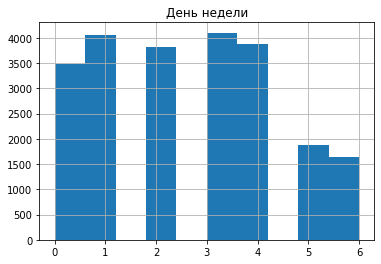

In [160]:
df['weekday'].hist();
plt.title('День недели');
plt.show();

Начиная с понедельника и по пятницу объявления размещаются массово. В субботу и воскресенье - реже, почти в 2 раза. Видимо, те кто размещает в выходные - это собственники. А остальные объявления - дело рук риэлторов. Либо, люди отдыхают, а потом в рабочие дни на работе продают квартиры, вместо того, чтобы работать. А может быть и то и другое вместе.

**Месяц публикации объявления**

In [161]:
df['month'].describe()

count    22830.000000
mean         6.403241
std          3.489148
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

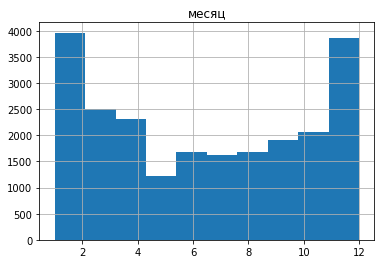

In [162]:
df['month'].hist();
plt.title('месяц');
plt.show();

Гистограмма напоминает график отпусков и садово-огородных работ. Зимой все дома, поэтому продают. Возможно и цены ниже в декабре и январе. 

Выведем полученные коэффициенты вариации

In [163]:
sorted_tuple= sorted(k_var.items(), key=lambda x: x[1])
sorted_tuple

[('kv_ceil_h', 0.07667507240357022),
 ('kv_tot_ar', 0.4084465809869562),
 ('kv_air', 0.44384382072510714),
 ('kv_rooms', 0.47362766271141993),
 ('kv_kith_ar', 0.47685441062835643),
 ('kv_liv_ar', 0.48061873542250716),
 ('kv_price', 0.5834638269542363),
 ('kv_city_centr', 0.5890390870705984),
 ('kv_fl_tot', 0.6157518983898251),
 ('kv_parks', 0.693450680092512),
 ('kv_floor', 0.831031334156486)]

**Вывод:**

Проведенное исследование показало, что наибольшее количество квартир, выставленных на продажу, имеет общую площадь от 30 до 70 кв. метров в ценовой категории от 2 до 6 млн. рублей. Квартиры расположены в основном на этажах с первого по пятый и продаются они в большинстве своем в пяти- и девятиэтажных домах. Высоте потолков от 2.5 до 3 метров. Основная часть объявлений о продаже относится к Санкт-Петербургу (66%) и географически они расположены преимущественно в северной части города СПб и имеют парки на расстоянии не более 1 км. 

Объявления о продаже появляются в основном в рабочие дни и наибольшее их количество - зимой.
 
Колебания стомости квартир вокруг средней стоимости значительные. По этой причине для более глубокого изучения совокупности ее необходимо делить на более однородные по цене группы.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики! 
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Для того чтобы подписать график мы можем использовать метод plt.title() и в конце кода применить plt.show(). По ссылкам ниже можно почитать подробнее как добавить название для графика или подписать его оси
    
    https://pyprog.pro/mpl/mpl_title.html
    https://pyprog.pro/mpl/mpl_axis_signatures.html 
</div>

#### Изучение срока продажи квартир

Построим гистограмму времени продажи квартир

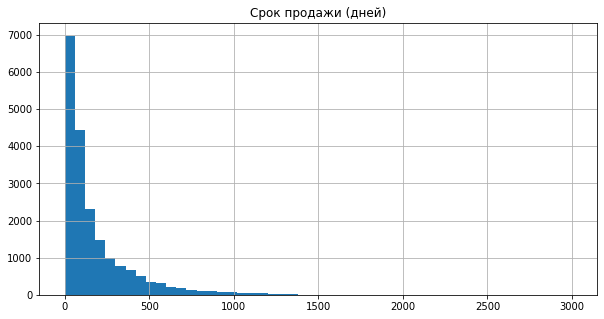

In [164]:
df['days_exposition'].hist(bins=50,range=(0,3000),figsize=(10,5));
plt.title('Срок продажи (дней)');
plt.show();

Из графика видно, что время продажи имеет "пульсирующий" характер. И оба импульса похожи на распределение Пуассона.

Построим более детальную гистограмму для первого импульса

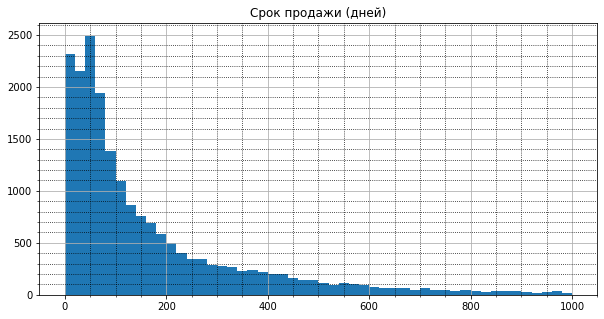

In [165]:
#df['days_exposition'].hist(bins=50,range=(0,1000),figsize=(10,5));
fig, ax = plt.subplots()
ax=df['days_exposition'].hist(bins=50,range=(0,1000),figsize=(10,5));
plt.title('Срок продажи (дней)');
ax.minorticks_on()
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.show();

Вполне описывается распределением Пуассона при математическом ожидании, равном 1

Видно, что довольно много квартир продается в районе 50 дней (первые три пика на гистограмме). В сумме около 7 тысяч квартир. Это порядка 30%. Из ни часть продается до 50 дней. 50% в районе 90-120 дней. Потом идет снижение интенсивности.

Посчитаем среднее и медиану

In [166]:
df['days_exposition'].agg(['mean','median','max'])

mean       177.510007
median      93.000000
max       1580.000000
Name: days_exposition, dtype: float64

В среднем квартира продается год. 
50% - 125 дней, что подтверждает выводы, сделанные по графику.

При изучении параметров было выявлено, что наибольшие продажи имеют однокомнатные и двухкомнатные квартиры. Посмотрим на сроки продажи этих квартир. 

Создадим сводную таблицу по количеству комнат и срокам продажи:

In [167]:
d = df.pivot_table(index='rooms',values='days_exposition',aggfunc=(['mean','median','count'])).head(10)
d.columns=['среднее','медиана','количество']
d

,среднее,медиана,количество
rooms,,,
0,109.285714,49.5,182
1,159.160485,81.0,7253
2,171.976051,91.0,6848
3,201.970614,113.0,4628
4,244.014870,146.0,807
5,275.898810,161.5,168


Медианные значения продаж 1 и 2 комнатных квартир находятся около 90 дней, что подтверждается гистограммой, средние - полгода.
Есть также квариры, продающиеся более года

Используя графики и значения статистических величин можно заключить, что быстрыми можно считать продажи до 50 дней, а вот долгими являются продажи более года

<div style="border:solid green 3px; padding: 20px">
<div class="alert alert-info">
<b>Доработка</b>
<br>

**Вывод:**

В ходе изучения сроков продажи квартир было установлено, что график распределения сроков продаж похож на Пуассоновское распределение с математическим ожиданием 1. То есть сроки продаж вполне вписываются в нормальные ожидания.

**Быстрыми** можно считать продажи **до 50** дней. 

**Долгими** являются продажи более **300 дней (10 месяцев)**

</div>

</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Здесь выводы нужно будет пересмотреть после правок в предыдущих разделах
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

#### Изучение факторов, влияющих на общую (полную) стоимость

На этапе изучения показателей была выявлен сильная вариация значений для столбца **last_price**. Коэффициент вариации равен 1,5.

In [168]:
df['last_price'].describe()

count    2.283000e+04
mean     5.372518e+06
std      3.134670e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.550000e+06
75%      6.468500e+06
max      1.999900e+07
Name: last_price, dtype: float64

75% процентов данных ограничены значением 6,8 млн.руб. Возьмем для "чистоты" исследований выборку от 430000 до 30000000 руб. Она покрывает 99% данных 

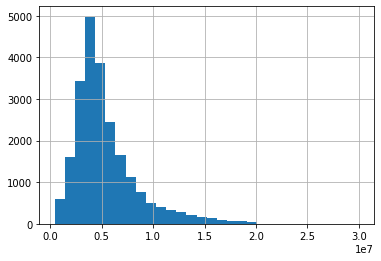

In [169]:
df['last_price'].hist(range=(430000,30000000),bins=30);

In [170]:
#data = df.query('locality_name=="Санкт-Петербург" and last_price<30000000')[['last_price','total_area','living_area','kitchen_area','rooms','floor_type','weekday','month','year','locality_name']]
data = df.query('rooms<5 and last_price<23150000 and total_area<123')[['last_price','total_area','living_area','kitchen_area','rooms','floor_type','weekday','month','year','locality_name']]

In [171]:
len(data)/len(df)

0.9791502409110819

In [172]:
data.head()

,last_price,total_area,living_area,kitchen_area,rooms,floor_type,weekday,month,year,locality_name
0,13000000,108.0,51,25,3,other,3,3,2019,Санкт-Петербург
1,3350000,40.4,18,11,1,first,1,12,2018,посёлок Шушары
2,5196000,56.0,34,8,2,other,3,8,2015,Санкт-Петербург
4,10000000,100.0,32,41,2,other,1,6,2018,Санкт-Петербург
5,2890000,30.4,14,9,1,other,0,9,2018,пгт. Янино-1


**Зависимость общей стоимости от общей площади**

Построим диаграмму рассеяния

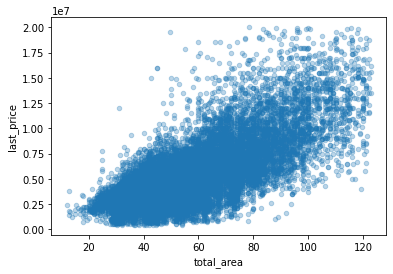

In [173]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3);

Находим коэффициент корреляции Пирсона

In [174]:
print(data['last_price'].corr(data['total_area']))

0.7412422516750704


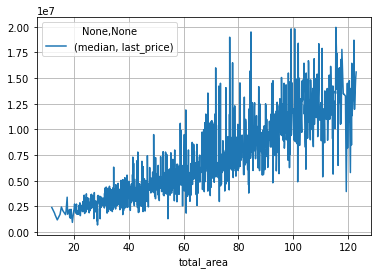

In [175]:
(
    data
    .pivot_table(index='total_area',values='last_price',aggfunc=['median'])
    .plot(grid=True)
);

Графики и коэффициент корреляции свидетельствует о **тесной зависимости стоимости квартиры от общей площади**

**Зависимость общей стоимости от жилой площади**

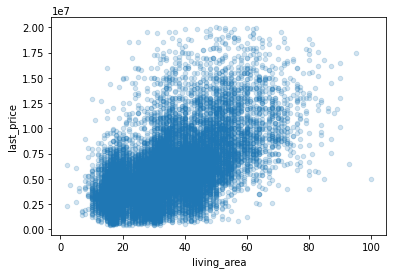

In [176]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.2);

In [177]:
print(data['last_price'].corr(data['living_area']))

0.6078852505331102


И график и коэффициент корреляции свидетельствует о **зависимости стоимости квартиры от жилой площади**. Зависимость менее значимая, в отличие от общей площади

In [178]:
a2 = data.groupby('living_area')['last_price'].median()

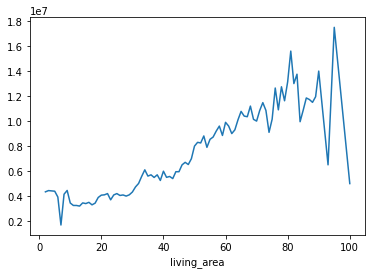

In [179]:
#hw.sort_values('height').plot(x='height', y='weight') 
a2.plot(x='living_area', y='last_price');

**Зависимость общей стоимости от площади кухни**

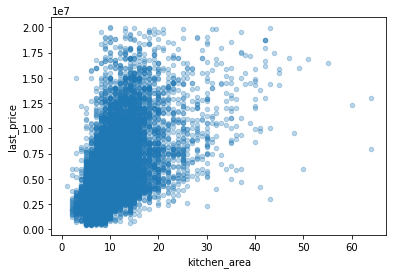

In [180]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3);

In [181]:
print(data['last_price'].corr(data['kitchen_area']))

0.5620148995744667


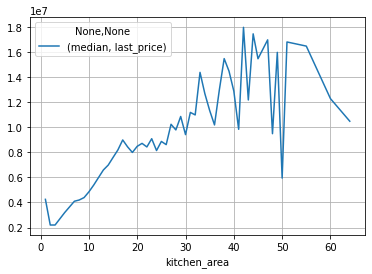

In [182]:
(
    data
    .pivot_table(index='kitchen_area',values='last_price',aggfunc=['median'])
    .plot(grid=True)
);

И график и коэффициент корреляции свидетельствует о наличии **зависимости стоимости квартиры от площади кухни**. Наибольшая зависимость на площадях до 18 кв.м

**Зависимость общей стоимости от количества комнат**

Количество комнат относитя к категориальному признаку, поэтому диаграмма рассеяния результата не дает

Построим линейный график зависимости средней и медианной стоимости жилья от количества комнат

Определим выборку, по которой будем стрить график

In [183]:
data.groupby('rooms')['rooms'].count()

rooms
0     196
1    8019
2    7844
3    5446
4     849
Name: rooms, dtype: int64

Будем строить сводную таблицу на основании данных о квартирах до пяти комнат включительно

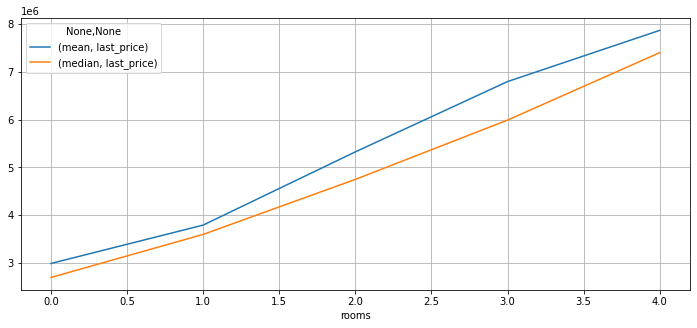

In [184]:
(
    data.query('rooms<=5')
    .pivot_table(index='rooms',values='last_price',aggfunc=['mean','median'])
    .plot(grid=True,figsize=(12,5))
);


Имеется тесная зависимость

**Зависимость общей стоимости от типа этажа квартиры**

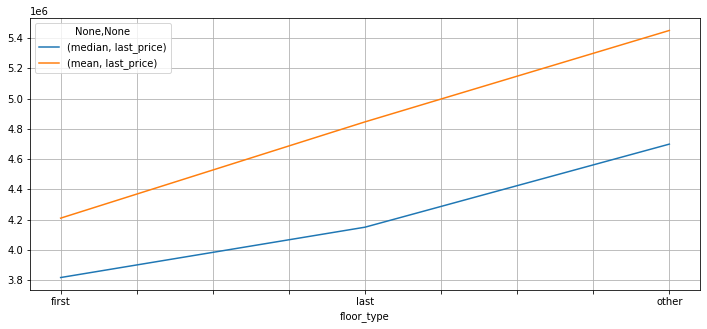

In [185]:
(
    data
    .pivot_table(index='floor_type',values='last_price',aggfunc=['median','mean'])
    .plot(grid=True,figsize=(12,5))
);

Зависимость от типа этажа имеется. Квартиры на первых и последних этажах дешевле, чем на остальных.

**Зависимость общей стоимости от даты подачи заявления(дня)**

Строим линейный график по медианным значениям

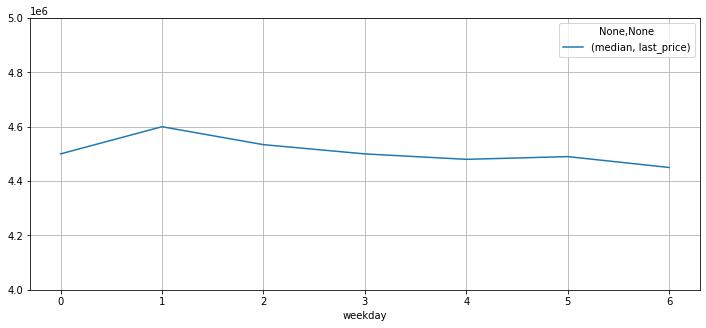

In [186]:
(
    data
    .pivot_table(index='weekday',values='last_price',aggfunc=['median'])
    .plot(grid=True,figsize=(12,5),ylim=(4000000,5000000))
);

Зависимости нет.

**Зависимость общей стоимости от даты подачи заявления(месяца)**

<AxesSubplot:xlabel='month'>

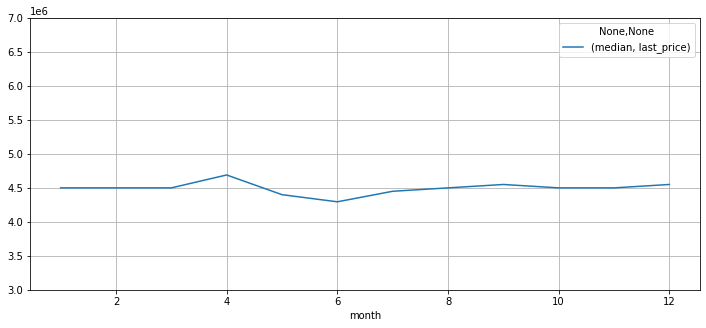

In [187]:
(
    data
    .pivot_table(index='month',values='last_price',aggfunc=['median'])
    .plot(grid=True,figsize=(12,5),ylim=(3000000,7000000))
)

Наблюдаются небольшие сезонные колебания

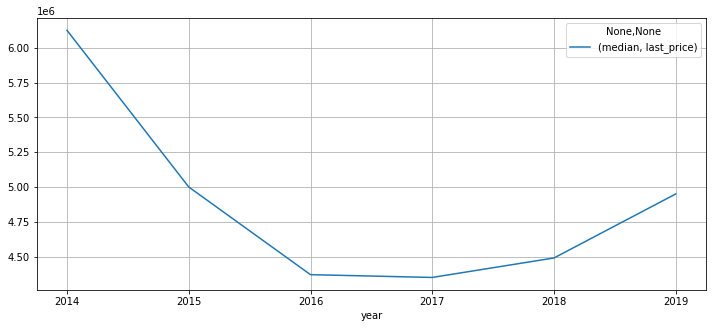

In [188]:
(
    data
    .pivot_table(index='year',values='last_price',aggfunc=['median'])
    .plot(grid=True,figsize=(12,5))
);

НАблюдается падение цены с 2014 по 2016 год.

Находим количество объявлений и медианную цену по годам

In [189]:
data.groupby('year')['last_price'].agg(['count','median'])

,count,median
year,,
2014,106,6125625
2015,1068,5000000
2016,2589,4370000
2017,7734,4350000
2018,8128,4490000
2019,2729,4950000


Отсекаем 2014 год причине малого количества данных

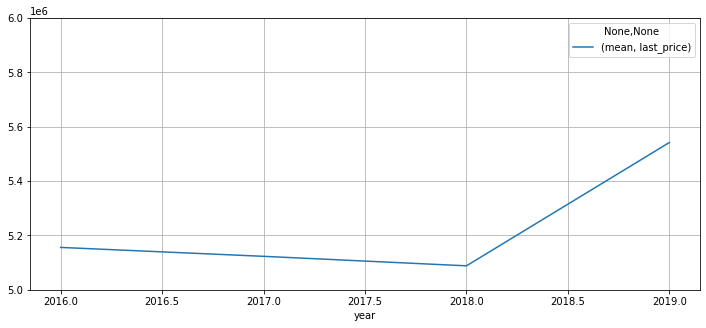

In [190]:
(
    data.query('year>2015')
    .pivot_table(index='year',values='last_price',aggfunc=['mean'])
    .plot(grid=True,figsize=(12,5),ylim=(5000000,6000000))
);

In [191]:
(5.6-5.1)/5.1 *100

9.803921568627452

Наблюдается повышение стоимости жилья на 10% и снижение предложений

**Вывод**

В связи со значительными колебаниями цен на жилье для проведении рассчетов была взята выборка объявлений из Санкт-Петербурга со стоимостью не выше 30 млн.руб. В эту выборку попадают практически все значения рассматриваемыех параметров.


|Параметры      |Общая площадь|Жилая площадь|Площадь кухни|Кол-во комнат| 
|---------------|-------------|--------------|-------------|------------|
|**стоимость жилья**|тесная зав-ть|тесная зав-ть | средняя     |   тесная зав-ть | 


Квартиры на первых этах в целом дешевле, последние этажи примерно равны по цене остальным.

Наблюдаются незначительные колебания цены, в зависимости от даты подачи объявления:

Зимой немного вырастают, к лету падают примерно на 10%, осенью уровень восстанавливается

С 2015 по 2018 год надлюдалось падение цен, с 2018 года  повышение на 10%


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Зависимость цены изучена верно! Ещё тут можно использовать для визуализации pairplot из библиотеки seaborn 
    
    https://seaborn.pydata.org/generated/seaborn.pairplot.html
</div>

#### средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Для анализа будем использоваьт все данные

In [192]:
metr_sel = df.pivot_table(index='locality_name',values='price_metr',aggfunc=['mean','count'] )

In [193]:
metr_sel.columns=['mean','count']

In [194]:
metr_sel = metr_sel.sort_values('count',ascending=False).head(10)

In [195]:
metr_sel

,mean,count
locality_name,,
Санкт-Петербург,108704.943811,14947
посёлок Мурино,85681.762601,556
посёлок Шушары,78677.364217,440
Всеволожск,67275.625879,396
Пушкин,101956.176763,358
Колпино,75333.295801,337
посёлок Парголово,90332.263023,326
Гатчина,68746.146763,307
деревня Кудрово,92473.547576,299


In [196]:
metr_sel['mean'] = metr_sel['mean'].astype(int)
metr_sel = metr_sel.sort_values('mean',ascending=False)
metr_sel

,mean,count
locality_name,,
Санкт-Петербург,108704,14947
Пушкин,101956,358
деревня Кудрово,92473,299
посёлок Парголово,90332,326
посёлок Мурино,85681,556
посёлок Шушары,78677,440
Колпино,75333,337
Гатчина,68746,307
Всеволожск,67275,396


In [197]:
#cчитаем процент
metr_sel['count'].sum()/len(df)

0.7972404730617608

Процент объявлений, поданных в данных населенных пунктах, составляет 80%

**Вывод:**

|Насел пункт | Средняя цена	 | кол-во объявлений|
|-------------|------|------|		
|Санкт-Петербург|	114801	|15748|
|Пушкин	|103125|	369|
|деревня Кудрово	|92473|	299|
|посёлок Парголово	|90175|	327|
|посёлок Мурино	|85681	|556|
|посёлок Шушары	|78677	|440|
|Колпино	|75424|	338|
|Гатчина	|68746	|307|
|Всеволожск	|68719|	397|
|Выборг|	58238	|235|

Наибольшее количество объявлений подано в Санкт-Петербурге и его пригородах. 
Представленный список содержит 80% объявлений от всей совокупности
Далеко от СПб только Выборг, цена кв. метра в наменьшая среди отобраных. 

Максимальную цену квадратного метра ожидаемо показывает Санкт-Петербург.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Как вариант, тут можно построить барплот для топ10, так будет более наглядно)
</div>

<div class="alert alert-info">
<b>Доработка</b>
<br>

**График:**

</div>

In [198]:
metr_sel.reset_index(inplace=True)
metr_sel.columns=['locality_name','mean','count']

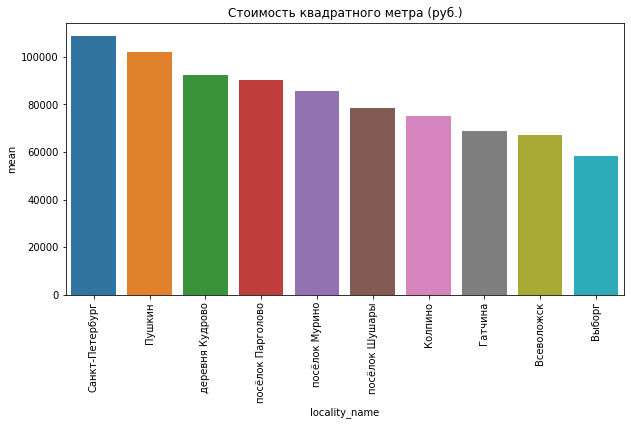

In [199]:
fg, ax = plt.subplots(figsize=(10, 5));
ax = sns.barplot(data=metr_sel,x='locality_name',y='mean');
ax.set(title='Стоимость квадратного метра (руб.)');
plt.xticks(rotation=90);

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Красота!
</div>

#### Средняя цена километра

Выбираем данные по Санкт-Петербургу

In [200]:
data_spb=df.query('locality_name=="Санкт-Петербург"')[['last_price','cityCenters_km']]

Округляем расстояние до центра до целого значения

In [201]:
data_spb['cityCenters_km'] = round(data_spb['cityCenters_km'] )

Строим сводную таблицу, группируя данные по километражу и подсчитывая для каждой группы среднее и количество по столбцу last_price

In [202]:
avg_price_km = data_spb.pivot_table(index='cityCenters_km',values='last_price',aggfunc=['mean','count'])

In [203]:
avg_price_km.columns=['сред цена','кол-во']

Выводим в нормальном виде значения

In [204]:
C = avg_price_km.style.format({'сред цена': '{:10.0f}', 'кол-во':'{}'})
C

,сред цена,кол-во
cityCenters_km,,
0.0,10198571,14
1.0,10303113,151
2.0,9793214,243
3.0,8798127,312
4.0,9183767,605
5.0,9193829,760
6.0,8447436,499
7.0,7891485,335
8.0,7828473,552


Строим график средней цены каждого километра

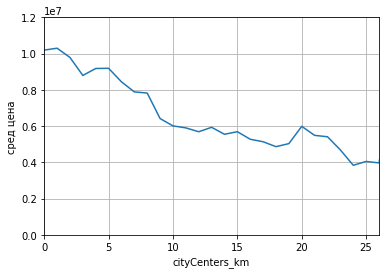

In [205]:
avg_price_km['сред цена'].plot(grid=True,xlim=(0,26),ylim=(0,12000000),ylabel='сред цена');

**Вывод**:

На графике видно, что есть тесная зависимость цены объекта, выставленного на продажу и расстоянием до центра города.

Цена при удалении от центра резко снижается к 3 км. - на 64 %. Удаление от центра, от реки Невы

Затем подъем в радиусе от 3 до 5 км. Это скорее всего связано с профилем реки Невы. При исследовании параметров было предположение, что много жилья выставлено на продажу в северной части города. На расстоянии 4-5 км в северной и северо-восточной части города протекает река Нева. Видимо, жилье продается на набережной или близко к ней, поэтому и возникает рост цены.

<div class="alert alert-info">
После снова резкое снижение нв радиусе 9 км. Это уже ближе к окраине города, промышленные районы.

После 9 км. цена снижается, но более плавно. 

</div>



<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Отличный анализ 👍
</div>

### Общий вывод

2. Для работы были предоставлены данные, содержащие некоторое количество пропущенной и искаженной информации. Искаженные значения не носили массовый характер и имели аномальные значения по причине невнимательности ввода данных пользователями и отсутствия корректной проверки в формах соответсвующих программных продуктов. Это касается высоты потолков. Была искажена цена одного объявления в СПб, но с успехом восстановлена. 

**Пропущенные** значения имели массовый характер:

- Жилая площадь, площадь кухни - восстановлены путем введения коэффицента от общей площади.
- Высота потолков - заменено средним по совокупности.
- дата подачи заявления - переведа в формат date_time
- Апартаменты не указывались пользователями, отсутствующие заменены на 0.
- Общая этажность - заменена на этаж, на котором продается квартира.
- Расстояние до центра города и аэропорта, как оказалось, не указывалось жителями сел, поселков и деревень. Эти значения оставлены пустыми
- количество парков и водоемов - аналогично
- расстояние до парков и до озер не указывались жителями городов, если 0 парков вокруг и жителями сел, деревень. Оставлены пустыми.
- пропуски в сроках продажи были оставлены без изменений 

Для расчетов и выявления зависимостей хватило имеющихся данных.

Для упрощения восприятия и уменьшения объема памяти у некоторых столбцов, не содержащих данных, были изменены типы с float на int.

Также в процессе предобработки данных заменены дублирующиеся значения населенных пунктов и некоторые изменены на общепринятые для удобства восприятия (поселок городского типа -> пгт.)

3. С помощью инструментов pandas были добавлены новые столбцы на основе имещихся данных

4. В ходе работы проведено изучение параметров данных и анализ влияния некоторых из них на стоимость жилья.

**4.1) Изучение параметров**

Параметры стоимость объектов, общая и жилая площади, этажность домов имеют большой разброс значений. Это привело к тому, что в дальнейшем при анализе были отброшены некоторые значения стоимости объектов. 

Наибольшее количество квартир, выставленных на продажу, имеет общую площадь от 30 до 70 кв. метров и находятся в ценовой категории от 2 до 6.8 млн. рублей. 

Много квартир расположено на этажах с первого по пятый. Что касается домов, то в большинстве своем это пяти- и девятиэтажные дома. Высота потолков стандартная - от 2.5 до 3 метров. 66% объявлений о продаже относится к Санкт-Петербургу, при этом  географически они расположены преимущественно в северной части города. 

Информация о парках и водоемах была предоставлена только в объявлениях, относящихся к СПб. Из имеющихся данных сделан вывод, что если парки есть, то в основном в радиусе 1 км.

Объявления о продаже появляются в основном в рабочие дни и наибольшее их количество - зимой.
 
**4.2) Сроки продаж квартир**

<div class="alert alert-info">
<b>Доработка</b>
<br>

<del>Квартиры продаются по-разному. Наблюдается два импульса. Один сильный - до 50 дней, второй гораздо позже, почти через три года.</del>

Самыми быстрыми можно считать продажи до **50 дней**, долгими - **более 10 месяцев**. 

</div>






График продаж сильно похож на распределение Пуассона.

**4.3) Влияние на общую стоимость**

<div class="alert alert-info">
<b>Доработка</b>
<br>

Исследование решено было проводить на данных, стоимость которых не превышает 23 млн. руб, с количеством комнат менее 5 и площадью, не превышающей 123 кв. м, чтобы избежать чрезмерного влияния очень дорого жилья. В эту выборку вписывается 95% данных и дорогое жилье в СПб и более дешевое в деревнях и селах.
</div>
Сводные результаты:


|Параметры      |Общая площадь|Жилая площадь|Площадь кухни|Кол-во комнат| 
|---------------|-------------|--------------|-------------|------------|
|**стоиомсть жилья**|сильное|сильное | среднее     |   сильное | 

<div class="alert alert-info">
<b>Доработка</b>
<br>
Квартиры на первых этажах в целом дешевле, последние этажи дороже, "остальные" этажи имеют более высокую цену.
</div>

Наблюдаются незначительные колебания цены в зависимости от даты подачи объявления:

Зимой цены немного повышаются, к лету наблюдается спад примерно на 10%,а осенью уровень цен восстанавливается.

<div class="alert alert-info">
<b>Доработка</b>
<br>
В 2015 -2018 незначительное падение цен, с 2018 повышение на 10%.

</div>
**4.4) Количество объявлений в населенных пунктах**

В десятку населенных пунктов с наибольшим количеством объявлений о продаже недвижимости попадают Санкт-Петербург и его пригороды, примыкающие к Кольцевой автодороге, а также близлежащие города.
Особняком стоит Выборг, расстояние от которого до СПб 140 км. Цена квадратного метра в Выборге является наименьшей в данной выборке. Наибольшая цена в СПб.

|Насел пункт | Средняя цена	 | кол-во объявлений|
|-------------|------|------|		
|Санкт-Петербург|	114801	|15748|
|Пушкин	|103125|	369|
|деревня Кудрово	|92473|	299|
|посёлок Парголово	|90175|	327|
|посёлок Мурино	|85681	|556|
|посёлок Шушары	|78677	|440|
|Колпино	|75424|	338|
|Гатчина	|68746	|307|
|Всеволожск	|68719|	397|
|Выборг|	58238	|235|


**4.5) Средняя стоимость каждого километра**

Выявлена **сильная зависимость** стомости жилья от расстояния до центра города. Причем эта **зависимость не носит линейный характер**.

Для простоты рассуждения примем радиальные расстояния.

<div class="alert alert-info">


Цена при удалении от центра резко снижается к 3 км . 

Затем подъем радиусе от 3 до 5 км. На расстоянии 4 - 5 км от центра в северной и северо-восточной части города протекает река Нева. Исходя из ранее сделанного предположения, что много  жилья в СПб  выставлено на продажу в северной части города и профиля реки Невы, можно предположить, что рост цен связан с жильем, выставленным на продажу в районе набережной.

В радиусе 5 - 9 км снова резкое снижение цены. Это уже ближе к окраине города, промышленные районы.

На расстоянии более 9 км от центра города цена плавно снижается. Есть незначительный рост на расстоянии 20 км., после чего снова снижение цены
   </div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>После всех внесённых правок, обязательно перепроверь общий вывод и промежуточные выводы и поправь их по необходимости
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Ты хорошо потрудился, большая часть работы сделана, но остаётся внести следующие правки:
<br>- не заполнять пропуски в столбцах с картографическими данными
<br>- не заполнять пропуски в столбце days_exposition
<br>- отбросить аномальные значения (площадь квартиры, стоимость, количество комнат)
<br>- поправить выводы там, где это необходимо
</div>

<div class="alert alert-info">
<b>Доработка</b>
<br>
Были внесены некоторые корректировки в заполнение пропусков, изменено построение графиков, для анализа данных была сделан копия данных с отсечением аномальных знаяений. Выборка покрывает 95% исходных данных

</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v2:</b> 
<br>Остались две правки:
<br>- отбросить аномальные значения (площадь квартиры, стоимость, количество комнат)
<br>- поправить выводы там, где это необходимо
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v3:</b>
<br>Все правки выполнены. Молодец!
<br>Проделана огромная работа! У тебя подробные, понятные и логичные выводы, которые ты подкрепляешь фактами. Были использованы разные графики и способы, чтобы как можно более тщательно изучить данные и у тебя это получилось! 
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод